In Week #5 you were provided two codes: "BasicRNG" & "QuickIsing". Use these codes, or your own implementation, to solve the following:

In [1]:
%%capture
# Install any resource not included in Colab here

In [185]:
# Include any library you may need here
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
from jax import random, jit, vmap
from functools import partial
from tqdm.notebook import tqdm
from jax.lax import cond
from scipy.optimize import curve_fit
from typing import Sequence
%matplotlib inline


In [3]:
# Gather your functions/methods here

RNG_NAME = "MT19937"




P5.1 - Make a numerical investigation of the number $\pi$ as a function of the number of trials, $N$, and the number of experiments, $M$, using both a good RNG and a bad RNG. Show the values of $\pi$ in a plot including the uncertainties and interpret these results. You can use the code "BasicRNG" or your own for this task. [Easy, 20 pts]

(Auxiliar questions: In each case, good and bad RNGs, how does the precission and accuracy of the determined value of $\pi$ change with $N$ and $M$? Would this results allow you to distinguish between a good and a bad RNG?)

In [4]:
# def monte_carlo_pi(N: int, goodPRNG: bool, key) -> float:
#     """Calculate pi using Monte Carlo simulation.
    
#     Args:
#         N: Number of points to use in the simulation.
#         goodPRNG: Use a good pseudo-random number generator.
        
#     Returns:
#         Estimated value of pi.
#     """
#     key = random.split(key, 1)[0]
#     if goodPRNG:
#         rands = random.uniform(key, (N, 2), minval=0, maxval=1)
        
#     else:
#         max = 50
#         badRNG = random.uniform(key, (max,), minval=0, maxval=1)
#         rands = np.array([[badRNG[i%max], badRNG[(i+int(i/N))%max]] for i in range(N)]).T
    
#     radii = np.sqrt(np.sum(rands**2, axis=1)) 
#     return 4 * np.sum(radii < 1) / N


# def calc_pi(N: int, M: int, goodPRNG: bool, key) -> tuple:
#     """Calculate pi using Monte Carlo simulation.
    
#     Args:
#         N: Number of trials to use in the simulation.
#         M: Number of experiments.
        
#     Returns:
#         Tuple of (pi, error).
#     """
#     newkeys = random.split(key, M)
#     pi_list = np.zeros(M,)
#     for i in (range(M)):
#         pi_list = pi_list.at[i].set(monte_carlo_pi(N, goodPRNG, newkeys[i]))
#     return (np.mean(pi_list), np.std(pi_list))

# numpoints = 10
# Ms = [2**i for i in range(1, numpoints)]
# Ns = [2**i for i in range(1, numpoints)]
# pi_list = np.zeros((len(Ms), len(Ns)))
# pi_err_list = np.zeros((len(Ms), len(Ns)))
# key = random.PRNGKey(0)
# for i, M in enumerate(Ms):
#     for j, N in enumerate(Ns):
#         temp = calc_pi(N, M, True, key)
#         pi_list = pi_list.at[i, j].set(temp[0])
#         pi_err_list = pi_err_list.at[i, j].set(temp[1])

# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# axs[0].set_xlabel('N')
# # axs[0].plot(Ns, pi_list[-1, :], label=f' Good RNG, M={Ms[-1]}')
# axs[0].errorbar(Ns, pi_list[-1, :], yerr=pi_err_list[-1, :],
#                 label=f' Good RNG, M={Ms[-1]}', elinewidth=1.5, capsize=2.0)
# axs[1].set_xlabel('M')
# axs[1].set_title(r'$\pi$ vs $M$ with fixed $N$')
# axs[1].errorbar(Ms, pi_list[:, -1], yerr=pi_err_list[:, -1],
#                 label=f'Good RNG, N={Ns[-1]}', elinewidth=1.5, capsize=2.0)
# for ax in axs:
#     ax.set_ylabel(r'$\pi$')
#     ax.legend()
#     ax.grid(ls='--')
#     ax.hlines(np.pi, 0, 2**(numpoints-1), ls=':', label=r'$\pi$')
    
# plt.show()



(Double click to type interpretation)

(If necessary, double click & insert plots here)

P5.2 - For different values of $\beta$, make plots of thermalization curves when the Ising model starts in both a cold and a hot initial configuration. Include the uncertainties of the action density. Describe your results. What happens if you consider grids of different sizes (e.g. $16\times16$, $32\times32$)[Easy, 20 pts]

In [5]:
# Type code here

(Double click to type interpretation)

(If necessary, double click & insert plots here)

P5.3 - An observable of interest is the self-correlation between the fields at different times (the first pointer in the arrays). This can be defined as:
    $$
        C(t) = \langle\tilde{\phi}(t)\tilde{\phi}(0)\rangle,
    $$

where
      $$
        \tilde{\phi}(t)\equiv\sum_{x_1}\phi(t,x_1).
    $$
    
In the code "QuickIsing" the r.h.s. of the second equation can be called as: np.sum( [ field[t][x] for x in range( LEN ) ] ), for some given "t". Define functions for the equations above and modify the code from the session, or your own, to sample $C(t)$ instead of the action. Plot your results when $\beta=0.35$ and for different lattice sizes. Remember to include the uncertainty of $C(t)$.[Medium, 30 pts]


In [6]:
# Type code here

(Double click to type interpretation)

(If necessary, double click & insert plots here)

P5.4 - Use the number 123 as a seed for the code "QuickIsing". Run the code for the following parameters:

$\beta$ = 0.25,

TIME = 48,

LEN = 48,

EVOLVE = 1000,

SEPARE = 100, and

REPEAT = 1.

Use the last generated configuration of the field. For the given configuration write a code that identifies clusters of fields with the same sign (You can try in a smaller lattice at first). Remember periodic boundary conditions apply. Hint: This is known as the Hoshen-Kopelman algorithm. [Medium/Hard, 10 pts]

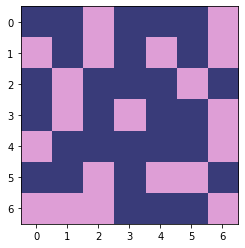

[[ 0  0 20  0  0  0 20]
 [20  0 20  0  5  0 20]
 [ 0  9  0  0  0  8  0]
 [ 0  9  0 10  0  0 13]
 [13  0  0  0  0  0 13]
 [ 0  0 20  0 16 16  0]
 [20 20 20  0  0  0 20]]


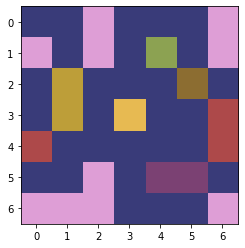

In [176]:

def union(labels: np.ndarray, label1: int, label2: int) -> np.ndarray:
    labels = np.where(labels == label2,
                      label1, labels)
    return labels


def compare_neighbors(lattice: np.ndarray, site_idx1: int,
                         site_idx2: int, top_label: int, labels: np.ndarray)-> tuple:
    
    N1, N2 = lattice.shape
    up, down, left, right = lattice[(site_idx1-1)%N1, site_idx2],\
                            lattice[(site_idx1+1)%N1, site_idx2],\
                            lattice[site_idx1, (site_idx2-1)%N2],\
                            lattice[site_idx1, (site_idx2+1)%N2]
    if site_idx1 == 3 and site_idx2 == 0:
        print(left, right, up, down)
        print(site_idx1, (site_idx2+1)%N2)
    if left:
        labels = union(labels, labels[top_label-1], labels[left-1])
    if right:
        labels = union(labels, labels[top_label-1], labels[right-1])
    if up:
        labels = union(labels, labels[top_label-1], labels[up-1])
    if down:
        labels = union(labels, labels[top_label-1], labels[down-1])
        
    return labels
        
    
def Hoshen_Kopelman(lattice):
    N1, N2 = lattice.shape
    labels = np.arange(1, N1*N2+1)
    top_label = 1
    label_lattice = -np.zeros_like(lattice)
    for row in range(N1):
        for column in range(N2):
            if lattice[row, column]:
                label_lattice = label_lattice.at[row, column].set(top_label)
                labels = compare_neighbors(label_lattice, row, column, top_label, labels)
                top_label += 1
                # print(label_lattice)
                # print(labels)
    for row in range(N1):
        for column in range(N2):
            if lattice[row, column]:
                label_lattice = label_lattice.at[row, column].set(
                    labels[label_lattice[row, column]-1])
    return label_lattice

def plot_lattice(lattice):
    plt.imshow(lattice, cmap='tab20b')
    plt.show()

lattice = random.randint(random.PRNGKey(0), (7, 7), 0, 2)
plot_lattice(lattice)
clusters = Hoshen_Kopelman(lattice)
print(clusters)
plot_lattice(clusters)

In [7]:
# Type code here

(Double click to type interpretation)

(If necessary, double click & insert plots here)

P5.5 - Start a lattice of size $12\times12$ filled with zeros and assume periodic boundary conditions. Write code for growing a spot. First start at a random position and give it the label n=1. Assign the label n=2 to its nearest neighbors (4 in total), the spot now has five elements in it. To the nearest neighbors of the cites with label 2 and which are not already part of the spot (thus 8) assign the label n=3, the spot now has thirteen elements in it. Repeat this sequence of steps until the spot can no longer grow. Make a visualization of the result (You can try this in a smaller lattice first). [Medium, 20 pts]

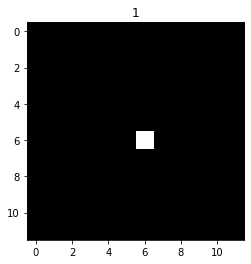

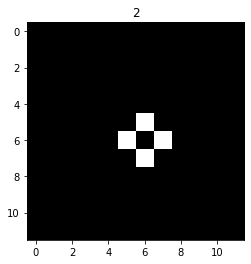

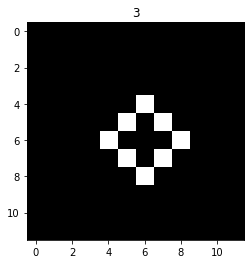

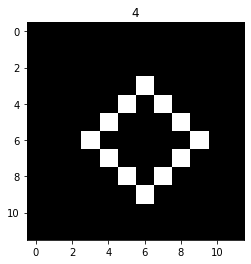

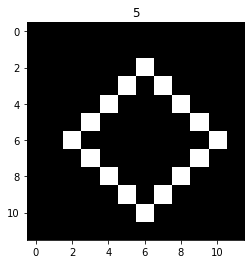

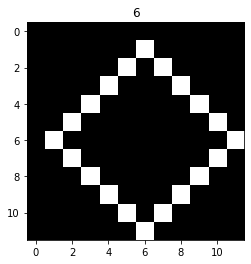

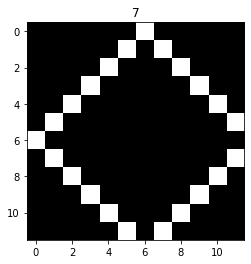

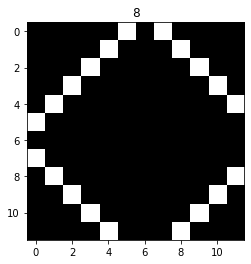

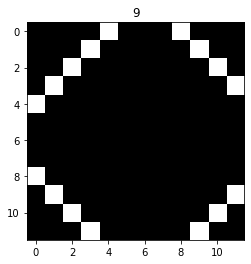

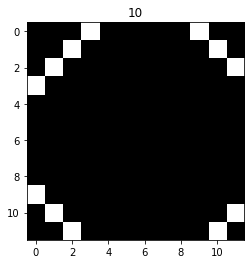

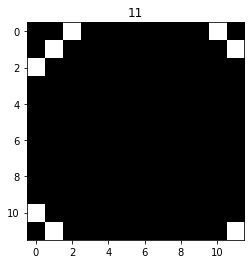

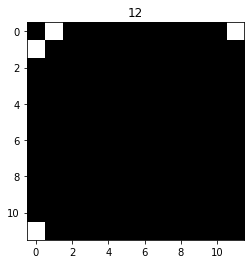

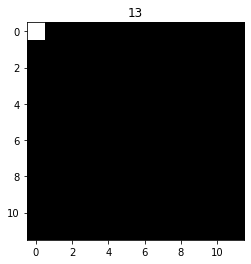

In [136]:
def spot_evolve(lattice):
    newLattice = np.bitwise_or(lattice, 
                                np.bitwise_or(np.roll(lattice, 1, axis=0),
                                np.bitwise_or(np.roll(lattice, -1, axis=0),
                                np.bitwise_or(np.roll(lattice, 1, axis=1),
                                np.roll(lattice, -1, axis=1)))))
    return newLattice

def plot_lattice(lattice, title=""):
    plt.imshow(lattice, cmap='gray')
    plt.title(title)
    plt.show()
    
lattice_len = 12
lattice = np.zeros((lattice_len, lattice_len), dtype=int)
rand_idx = random.randint(random.PRNGKey(0), (2,), 0, lattice_len)
lattice = lattice.at[rand_idx[0], rand_idx[1]].set(True)
lattice_evol = []
lattice_evol.append(lattice.copy())
while (lattice != np.ones((lattice_len, lattice_len))).any():
    lattice = spot_evolve(lattice)
    lattice_evol.append(lattice)
    
lattice_evol = np.array(lattice_evol)
n_lattices = np.zeros_like(lattice_evol)
for idx in reversed(range(1, len(lattice_evol))):
    n_lattices = n_lattices.at[idx].set(np.bitwise_xor(lattice_evol[idx], lattice_evol[idx-1]))
n_lattices = n_lattices.at[0].set(lattice_evol[0])

for idx, lattice in enumerate(n_lattices):
    plot_lattice(lattice, title=f"{idx+1}")


(Double click to type interpretation)

(If necessary, double click & insert plots here)

P5.6 - Reproduce the results reported in [Gattringer-Lang 1993](https://doi.org/10.1016/0550-3213(93)90155-I) using the Metropolis algorithm instead of the Swendsen-Wang algorithm. [Hard, not for credit but if you do solve this problem ignore the previous excercises (100+ extra pts).]

### Theoretical Analysis

Before we begin to code, we begin by theoretically calculating what will be the change in the action 
$$S[\varphi, \eta] = -\kappa_\varphi\sum \varphi_x\varphi_{x+\hat{\mu}} - \kappa_\eta\sum \eta_x\eta_{x+\hat{\mu}} +g\sum\eta_x \varphi_x\varphi_{x+\hat{\mu}}$$
where all sums are taken over $x \in \Lambda, \; \hat{\mu}\in \{\hat{x}, \hat{y}\}$, where $\Lambda$ is our 2 dimensional finite lattice.

First we consider the change $\delta_{\varphi} S(y)$ produced by $\varphi_{y} \to -\varphi_{y}$ for a fixed $y$. 

Only the first and third terms in $S$ will contribute since the second term is independent of $\varphi$, and their contribution is 
$$
    \delta_{\varphi} S(z) = 2 \varphi_{z} (\varphi_{z-\hat{x}}+\varphi_{z+\hat{x}}+\varphi_{z-\hat{y}}+ \varphi_{z+\hat{y}})(\kappa_\varphi-g\eta_{z})
$$

On the other hand, we only get contributions from the second and third term for $\eta$, namely:
$$
    \delta_{\eta} S(z) = 2\eta_{z}\kappa_\eta\left[\eta_{z+\hat{x}}+\eta_{z-\hat{x}}+\eta_{z+\hat{y}}+\eta_{z-\hat{y}}-\frac{g}{\kappa_\eta}\varphi_z(\varphi_{z+\hat{x}}+\varphi_{z-\hat{x}}+\varphi_{z+\hat{y}}+\varphi_{z-\hat{y}})\right]
$$

In [250]:
def init_fields(T: int, L:int, key: random.PRNGKey, start_type: str) -> tuple:
    """Initializes the fields phi and eta

    Args:
        N (int): Lattice size (we assume a square lattice)
        key (random.PRNGKey): JAX random key
        start_type (str): Either 'cold' or 'hot' (ordered or disordered phases)

    Raises:
        ValueError: If start_type is not 'cold' or 'hot'

    Returns:
        tuple: phi and eta fields (tuple of 2 two-dimensional-arrays)
    """
    if start_type.casefold() == "cold":
        phi = np.ones((T, L))
        eta = np.ones((T, L))
    elif start_type.casefold() == "hot":
        keys = random.split(key, 2)
        phi = random.randint(keys[0], shape=(T, L), minval=0, maxval=2)*2-1
        eta = random.randint(keys[1], shape=(T, L), minval=0, maxval=2)*2-1
    else:
        raise ValueError("start_type must be either 'cold' or 'hot'")
    return phi, eta


def S(phi: np.ndarray, eta: np.ndarray, params: tuple) -> float:
    """Compute the action of the system

    Args:
        phi (np.ndarray): phi field in the paper (2D array)
        eta (np.ndarray): eta field in the paper (2D array)
        params (tuple): tuple of parameters (k_phi, k_eta, g)

    Returns:
        float: action of the system
    """
    k_phi, k_eta, g = params
    S = 0
    S -= k_phi * np.sum(phi*np.roll(phi, 1, axis=0)+phi*np.roll(phi, 1, axis=1))
    S -= k_eta * np.sum(eta*np.roll(eta, 1, axis=0)+eta*np.roll(eta, 1, axis=1))
    S += g * np.sum(eta*phi*(np.roll(phi, 1, axis=0)+np.roll(phi, 1, axis=1)))
    return S


def dS_phi(phi: np.ndarray, eta: np.ndarray, t: int, x: int, params: tuple) -> float:
    """Compute the change in action when flipping phi[t, x]

    Args:
        phi (np.ndarray): phi field in the paper (2D array)
        eta (np.ndarray): eta field in the paper (2D array)
        t (int): index for first dimension of element to be flipped
        x (int): index for second dimension of element to be flipped
        params (tuple): tuple of parameters (k_phi, k_eta, g)

    Returns:
        float: change in action
    """
    k_phi, k_eta, g = params
    T, L = phi.shape
    dS = 2 * phi[t, x] * \
        (phi[t, (x-1)%L]+phi[t, (x+1)%L]+phi[(t-1)%T, x]+phi[(t+1)%T, x]) *\
            (k_phi - g * eta[t, x])
    return dS


def dS_eta(phi: np.ndarray, eta: np.ndarray, t: int, x: int, params: tuple) -> float:
    """Compute the change in action when flipping eta[t, x]

    Args:
        phi (np.ndarray): phi field in the paper (2D array)
        eta (np.ndarray): eta field in the paper (2D array)
        t (int): index for first dimension of element to be flipped
        x (int): index for second dimension of element to be flipped
        params (tuple): tuple of parameters (k_phi, k_eta, g)

    Returns:
        float: change in action
    """
    k_phi, k_eta, g = params
    N = phi.shape[0]
    dS = 2 * eta[t, x] * k_eta * \
        (eta[t, (x-1)%N]+eta[t, (x+1)%N]+eta[(t-1)%N, x]+eta[(t+1)%N, x] -\
            g/k_eta*phi[t, x] * \
                (phi[t, (x-1)%N]+phi[t, (x+1)%N]+phi[(t-1)%N, x]+phi[(t+1)%N, x]) ) 
    return dS


def repeat_Metropolis(phi: np.ndarray, eta: np.ndarray,
                      params: tuple, numReps: int, key: random.PRNGKey) -> tuple:
    """Repeat the Metropolis algorithm numReps times

    Args:
        phi (np.ndarray): phi field in the paper (2D array)
        eta (np.ndarray): eta field in the paper (2D array)
        params (tuple): tuple of parameters (k_phi, k_eta, g)
        numReps (int): number of repetitions of the Metropolis algorithm
        key (random.PRNGKey): JAX random key

    Returns:
        tuple: phi and eta fields after being evolved (tuple of 2 two-dimensional-arrays)
    """
    T, L = phi.shape
    ident, invert = lambda x: x, lambda x: -x   # functions to use in cond()
    
    
    def metropolis_step(idx: int, fields_and_key: tuple) -> tuple:
        """Perform one step of the Metropolis algorithm 
        To be used in lax.fori_loop() so we need to have a dummy index

        Args:
            idx (int): dummy index
            fields_and_key (tuple): tuple of fields and key (phi, eta, key)

        Returns:
            tuple: tuple of fields and key (phi, eta, key)
        """
        phi, eta, key = fields_and_key
        phiKeyt, phiKeyx, phiKeyRand, etaKeyt, etaKeyx, etaKeyRand = random.split(key, 6)
        
        # first we do metropolis for phi
        t = random.randint(phiKeyt, shape=(), minval=0, maxval=T)
        x = random.randint(phiKeyx, shape=(), minval=0, maxval=L)
        dSphi = jit(dS_phi)(phi, eta, t, x, params)
        phi = phi.at[t, x].set(
            cond(random.uniform(phiKeyRand) < np.exp(-dSphi), invert, ident, phi[t, x]))
            
        # then we do metropolis for eta
        t = random.randint(etaKeyt, shape=(), minval=0, maxval=T)
        x = random.randint(etaKeyx, shape=(), minval=0, maxval=L)
        dSeta = jit(dS_eta)(phi, eta, t, x, params)
        eta = eta.at[t, x].set(
            cond(random.uniform(etaKeyRand) < np.exp(-dSeta), invert, ident, eta[t, x]))
        
        newkey = random.split(key)[0]
        return (phi, eta, newkey)
    
    first_fields_and_key = (phi, eta, key)
    phi, eta, _ = jax.lax.fori_loop(0, numReps, metropolis_step, first_fields_and_key)
    
    return phi, eta

In [251]:
REPEAT = int(1e3)
EVOLVE = 2000    # Number of measurements
SEPARE =  100

actions = np.zeros((REPEAT, EVOLVE))

k_phis = [0.3948, 0.3897, 0.3700]
k_etas = [0.3268, 0.3323, 0.3700]
gs = [0, 0.02, 0.04]

key = jax.random.PRNGKey(0)
keys_init = random.split(key, REPEAT)

def hot_evolve(params: tuple, key: random.PRNGKey) -> tuple:
    """Computes the evolution of the fields and the action for a given set of parameters.
    To be vmapped along the axis of keys (REPEAT times)

    Args:
        params (tuple): tuple of parameters (k_phi, k_etta, g)
        key (random.PRNGKey): random key

    Returns:
        tuple: tuple of fields and actions
    """
    key = random.split(key, 1)[0]
    def evolve(fields_and_keys, idx):
        phi, eta, key = fields_and_keys
        newkey = random.split(key, 1)[0]
        phi, eta =jit(repeat_Metropolis, static_argnums=3)(
            phi, eta, params, SEPARE, key)
        new_fields_and_keys = (phi, eta, newkey)
        return new_fields_and_keys, jit(S)(phi, eta, params)/phi.shape[0]/phi.shape[1]
    
    phi, eta = init_fields(100, 60, key, 'hot')
    init_fields_and_keys = (phi, eta, key)
    fields_and_keys, actions = jax.lax.scan(evolve, init_fields_and_keys, None, length=EVOLVE)
    return fields_and_keys, actions

actions, action_means, action_stds, field_configs = [], [], [], []
for k_phi, k_etta, g in zip(k_phis, k_etas, gs):
    params = (k_phi, k_etta, g)
    vectorized_hot_evolve = vmap(jit(hot_evolve), in_axes=[None, 0])
    temp = vectorized_hot_evolve(params, keys_init)
    actions.append(temp[1])
    field_configs.append(temp[0][:-1])              # We neglect the keys
    action_means.append(np.mean(temp[1], axis=0))
    action_stds.append(np.std(temp[1], axis=0))
        
        
        
        

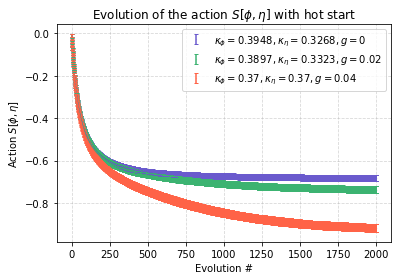

In [253]:
colors = ["slateblue", "mediumseagreen", "tomato"]
for i in range(3):   
       plt.errorbar(np.arange(EVOLVE), action_means[i], xerr=None, yerr=action_stds[i],
              mfc='w', ms=0.1, fmt='o', elinewidth=1.5, zorder=8,
                     capsize=2.0, mew=1.0, alpha=1.0, c=colors[i], ecolor=colors[i],
                     label=rf"$\kappa_\phi={k_phis[i]}, \kappa_\eta={k_etas[i]}, g={gs[i]}$")
       # plt.plot(np.arange(EVOLVE), action_means[i], c=colors[i], label=rf"$\kappa_\phi={k_phis[i]}, \kappa_\eta={k_etas[i]}, g={gs[i]}$")
plt.grid(ls='--', alpha=0.5)
plt.xlabel('Evolution #')
plt.ylabel(r'Action $S[\phi, \eta]$')
plt.title(r'Evolution of the action $S[\phi, \eta]$ with hot start')
plt.legend()      
plt.show()

In [254]:
def momentum_fourier_op(field: np.ndarray, nu: float) -> np.ndarray:
    """Computes the momentum Fourier transform of a field as in eq (19) in the paper.

    Args:
        field (np.ndarray): field of shape (N, T)
        nu (float): momentum (second) indices

    Returns:
        np.ndarray: momentum Fourier transform of the field
    """
    x = np.arange(0, field.shape[1], 1, dtype=int)
    p1nu = 2*np.pi*nu/field.shape[1]
    phase = np.exp(1j*x*p1nu)
    print(field.shape)
    return np.sum(field*phase[None:], axis=1)


def find_p_0nu(fields: np.ndarray, actions:np.ndarray, nus: np.ndarray) -> np.ndarray:
    """Computes the p_0nu parameters as is suggested by the connected correalation
    function decaying as exp(-p_0nu*t). Plots the fit for nu=0.

    Args:
        fields (np.ndarray): several fields (shape (REPEAT, N, T))
        actions (np.ndarray): several actions (shape (REPEAT,))
        nus (np.ndarray): momentum indices

    Returns:
        np.ndarray: Parameters obtained after fitting the exponential decay 
        each one being (a, b, c) and thus shape is (len(nus), 3)
        
    NOTE: only b is p0nu, a and c are just fitting parameters
    """
    Z = np.sum(np.exp(-actions))
    
    vectorized_momentum_fourier_op = vmap(
        vmap(momentum_fourier_op, in_axes=(0, None)), in_axes=(None, 0))
    
    field_op = vectorized_momentum_fourier_op(fields, nus)
    connected_corr_func = 1/Z * np.sum(
        np.conj(field_op[...,0])[:,:,None]*field_op * \
            np.exp(-actions[None,:,None]), axis=1)
    
    connected_corr_func -= np.sum(
        np.conj(field_op[...,0])*np.exp(-actions[None,:]), axis=1)[:,None] * \
            np.sum(field_op*np.exp(-actions[None,:,None]), axis=1)/Z**2
    connected_corr_func = np.real(connected_corr_func)
    T_plot = fields.shape[1]//2         # we only use half of lattice
    t = np.arange(0, T_plot, 1)         # because of periodic boundary conditions
    
    def func(t, a, b, c):
        return a * np.exp(-b * t) + c
    
    p0_nus_params = np.zeros((len(nus), 3))
    for idx in range(len(nus)):
        opt_params, _ = curve_fit(func, t, connected_corr_func[idx, :T_plot])
        p0_nus_params = p0_nus_params.at[idx].set(opt_params)
        if nus[idx] == 0:
            plt.plot(t, connected_corr_func[idx, :T_plot], label=r'data $\nu=0$', color='C0')
            plt.plot(t, func(t, *opt_params), ls='--', label=r'fit $\nu=0$', color='C0')
            plt.legend()
            plt.grid(ls='--')
            plt.xlabel(r'$t$')
            plt.ylabel(r'$\langle \tilde{\phi}(0, 0)^\star \tilde{\phi}(t, 0) \rangle_c$')
            plt.show()
    return p0_nus_params


def mass(fields: Sequence[np.ndarray], actions: Sequence[np.ndarray]) -> Sequence[float]:
    """Computes the mass of the fields using the p_0nu parameters. 
    Plots the p_0nu parameters for nu=0 along with the exact (alleged) relationship.

    Args:
        fields (np.ndarray): several thermalized field configurations (for each set of parameters, 
        each one shape (REPEAT, N, T)
        actions (np.ndarray): several thermalized actions (for each set of parameters, 
        each one of shape (REPEAT,))

    Returns:
        np.ndarray: mass of the fields
    """
    masses_phi = []
    for elem, action, scenario in zip(fields, actions, ['I', 'II', 'III']):
        therm_action = action[:,-1]         # thermalized actions only
        phis, etas = elem
        nus = np.arange(0, 7, 1, dtype=int)
        p0nu_phi_params = find_p_0nu(phis, therm_action, nus)
        p0nu_phi = p0nu_phi_params[:,1]
        p1nu_phi = nus*2*np.pi/phis.shape[1]
        plt.scatter(p1nu_phi, p0nu_phi, label=r'$p_{0, \nu}$', color='C0')
        plt.plot(p1nu_phi, np.arccosh(1-np.cos(p1nu_phi)+np.cosh(p0nu_phi[0])),
                 label=r'$\cosh^{-1}(1-\cos p_{1, \nu}+\cosh m)$', color='C1', ls='--')
        plt.grid(ls='--')
        plt.legend()
        plt.xlabel(r'$p_{1, \nu}$')
        plt.ylabel(r'$p_{0, \nu}$')
        plt.title("Scenario " + scenario)
        plt.show()
        masses_phi.append(p0nu_phi[0])
    return masses_phi

(100, 60)


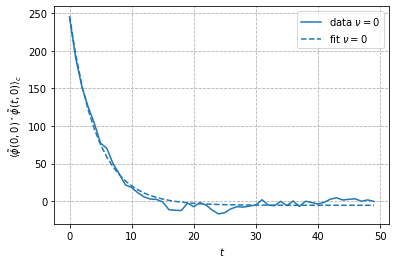

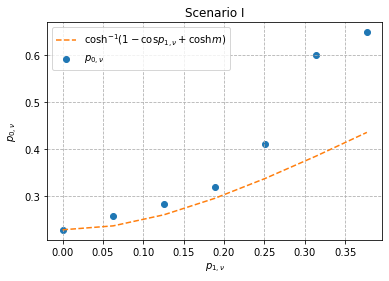

(100, 60)


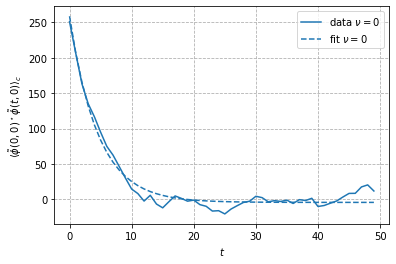

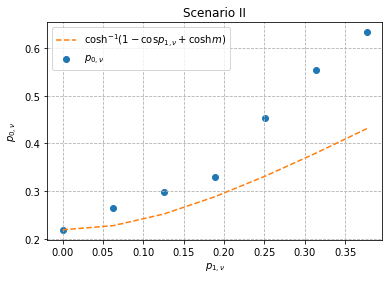

(100, 60)


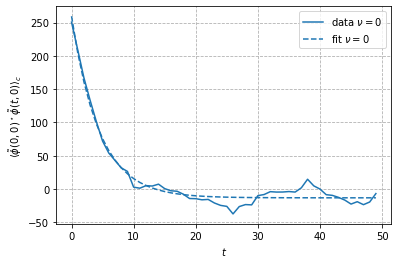

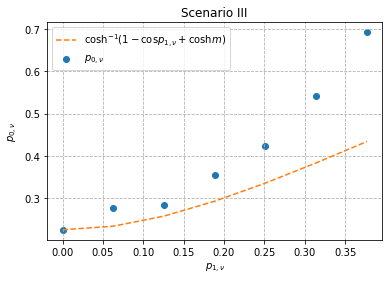

Estimated masses $m_\varphi$: [Array(0.2275073, dtype=float32), Array(0.21887568, dtype=float32), Array(0.22451459, dtype=float32)]


In [255]:
print(r"Estimated masses $m_\varphi$:", mass(field_configs, actions))

The results do not quite match the results from the paper, but they appear to follow a similar trend nonetheless. Assuming there is nothing wrong with this code (a big assumption :p ), this could point indeed towards limitations in the Metropolis method employed. Nonetheless, we can see that the masses are quite close to the ones in the paper since the values differ by less than 10% relative error.

Please use the space below to give us some your opinion regarding the content of this week's session.

This week was really fun! The first exercises were almost like solving little puzzles each (with the cluster algorithm and the spreading spot). I enjoyed solving them, and they do keep me up thinking for a wihle :) 

The last exercise was, indeed, hard. However, it is really nice to get involved in a proper research task and trying to obtain the same results (although it was not particularly achieved). Nonetheless, it put everything I learnt this week to use, and required me to optimize the code as well to have some legitimate sampling. Nice exercise!